In [25]:
import os
import cv2 as cv
import numpy as np
import pymatreader as pymat
import matplotlib.pyplot as plt

In [4]:
path_str = os.getcwd()

data_file_name = 'Majazi1.mat'
gt_file_name = 'Majazi1_gt.mat'

data_file_path = os.path.join(path_str, data_file_name)
gt_file_path = os.path.join(path_str, gt_file_name)

In [7]:
data = pymat.read_mat(data_file_path)['Botswana']
data_gt = pymat.read_mat(gt_file_path)['Botswana_gt']

In [8]:
print(f"Shape of Data: {data.shape}")
print(f'Shape of labels: {data_gt.shape}')
print(f'Data Type: {data.dtype}')

Shape of Data: (1476, 256, 145)
Shape of labels: (1476, 256)
Data Type: uint16


In [35]:
data_plot = data[:, :, [140]]
data_plot = data_plot.astype(np.uint8)
gt_plot = data_gt.astype(np.uint8)
print(f'{data_plot.dtype}')
print(f'{gt_plot.dtype}')

uint8
uint8


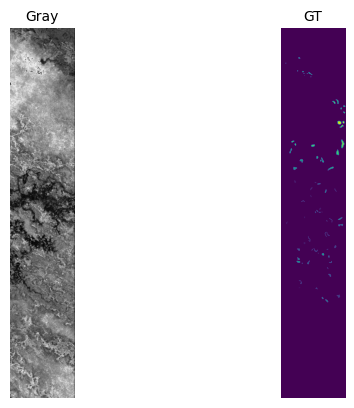

In [40]:
plt.figure(1)
plt.subplot(1, 2, 1), plt.imshow(data_plot, cmap='gray'), plt.axis('off'), plt.title('Gray', fontsize=10)
plt.subplot(1, 2, 2), plt.imshow(gt_plot), plt.axis('off'), plt.title('GT', fontsize=10)
plt.show()

In [11]:
classes = np.unique(data_gt)
print(f'Classes: {classes}')

Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [9]:
data_reshaped = data.reshape((data.shape[0] * data.shape[1], data.shape[2]))
gt_reshaped = data_gt.flatten()
print(f'Shape of reshaped Data: {data_reshaped.shape}')
print(f'Shape of reshaped GT: {gt_reshaped.shape}')

Shape of reshaped Data: (377856, 145)
Shape of reshaped GT: (377856,)


$\newline$
$\newline$
<a name=''>$\large{\bf{\text{Morphology}}}$</a>
$\newline$
$\newline$

In [37]:
data_morph = data_plot

$\newline$
$\newline$
- <a name=''>${\bf{\text{Erosion}}}$</a>
$\newline$
$\newline$

In [50]:
kernel = np.ones((5, 5), np.uint8)
data_eroded = cv.erode(data_morph, kernel, iterations = 1)

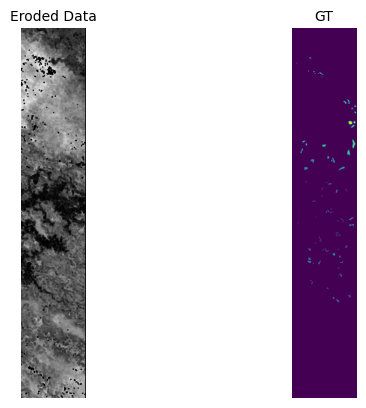

In [51]:
plt.figure(1)
plt.subplot(1, 2, 1), plt.imshow(data_eroded, cmap='gray'), plt.axis('off'), \
plt.title('Eroded Data', fontsize=10)
plt.subplot(1, 2, 2), plt.imshow(gt_plot), plt.axis('off'), plt.title('GT', fontsize=10)
plt.show()

$\newline$
$\newline$
- <a name=''>${\bf{\text{Dilation}}}$</a>
$\newline$
$\newline$

In [52]:
kernel = np.ones((5, 5), np.uint8)
data_dilated = cv.dilate(data_morph, kernel, iterations = 1)

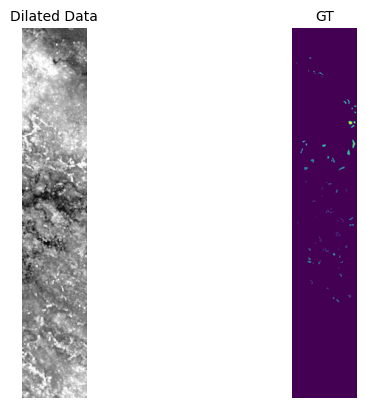

In [53]:
plt.figure(1)
plt.subplot(1, 2, 1), plt.imshow(data_dilated, cmap='gray'), plt.axis('off'), \
plt.title('Dilated Data', fontsize=10)
plt.subplot(1, 2, 2), plt.imshow(gt_plot), plt.axis('off'), plt.title('GT', fontsize=10)
plt.show()

$\newline$
$\newline$
- <a name=''>${\bf{\text{Opening}}}$</a>
$\newline$
$\newline$

In [54]:
kernel = np.ones((5, 5), np.uint8)
data_opening = cv.morphologyEx(data_morph, cv.MORPH_OPEN, kernel)

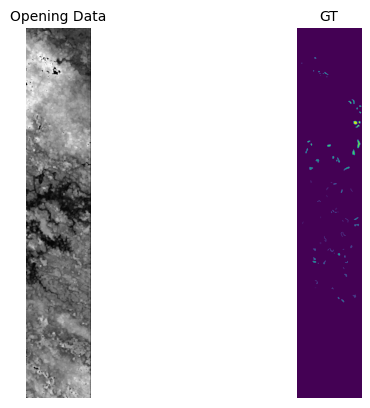

In [55]:
plt.figure(1)
plt.subplot(1, 2, 1), plt.imshow(data_opening, cmap='gray'), plt.axis('off'), \
plt.title('Opening Data', fontsize=10)
plt.subplot(1, 2, 2), plt.imshow(gt_plot), plt.axis('off'), plt.title('GT', fontsize=10)
plt.show()

$\newline$
$\newline$
- <a name=''>${\bf{\text{Closing}}}$</a>
$\newline$
$\newline$

In [56]:
kernel = np.ones((5, 5), np.uint8)
data_closing = cv.morphologyEx(data_morph, cv.MORPH_CLOSE, kernel, )

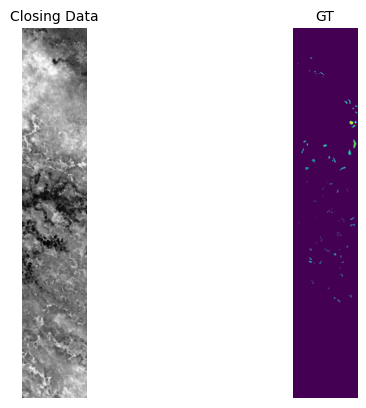

In [61]:
plt.figure(1)
plt.subplot(1, 2, 1), plt.imshow(data_closing, cmap='gray'), plt.axis('off'), \
plt.title('Closing Data', fontsize=10)
plt.subplot(1, 2, 2), plt.imshow(gt_plot), plt.axis('off'), plt.title('GT', fontsize=10)
plt.show()

$\newline$
$\newline$
- <a name=''>${\bf{\text{Morphological Gradient}}}$</a>
$\newline$
$\newline$

In [59]:
kernel = np.ones((5, 5), np.uint8)
data_gradient = cv.morphologyEx(data_morph, cv.MORPH_GRADIENT, kernel)

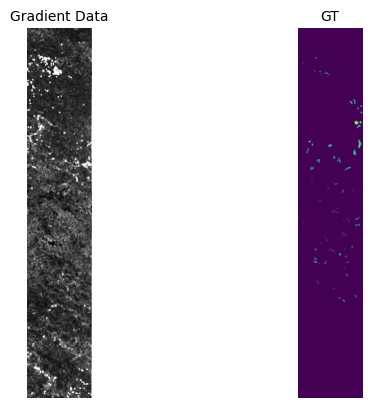

In [62]:
plt.figure(1)
plt.subplot(1, 2, 1), plt.imshow(data_gradient, cmap='gray'), plt.axis('off'), \
plt.title('Gradient Data', fontsize=10)
plt.subplot(1, 2, 2), plt.imshow(gt_plot), plt.axis('off'), plt.title('GT', fontsize=10)
plt.show()

$\newline$
$\newline$
<a name=''>$\large{\bf{\text{References}}}$</a>
$\newline$
$\newline$
- <a name=''>[$\underline{\bf{\text{Morphology in CV2}}}$](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html)</a>
$\newline$
$\newline$
$\newline$
$\newline$